# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [20]:
# Add Matplotlib inline magic command

%matplotlib inline

# Dependencies and Setup

import matplotlib.pyplot as plt

import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [21]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Amandaburgh,3/5/2019 2:15,26.28,9.070000e+11,12,Urban
1,Amandaburgh,2/24/2019 23:10,43.66,6.570000e+12,12,Urban
2,Amandaburgh,2/10/2019 20:42,36.17,6.460000e+12,12,Urban
3,Amandaburgh,1/11/2019 2:22,29.24,7.280000e+12,12,Urban
4,Amandaburgh,1/21/2019 4:12,9.26,5.530000e+12,12,Urban


## Deliverable 1: Get a Summary DataFrame 

In [22]:
#  1. Get the total rides for each city type

total_city_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]

total_city_rides.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [23]:
# 2. Get the total drivers for each city type

total_city_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]

total_city_drivers.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [24]:
#  3. Get the total amount of fares for each city type

total_city_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

total_city_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [25]:
#  4. Get the average fare per ride for each city type. 

avg_fare_per_ride = total_city_fares / total_city_rides

avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [26]:
# 5. Get the average fare per driver for each city type. 

avg_fare_per_driver = total_city_fares / total_city_drivers

avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [27]:
#  6. Create a PyBer summary DataFrame. 

total_summary_df = pd.DataFrame({
    
    "Total Rides": total_city_rides,
    
    "Total Drivers": total_city_drivers,
    
    "Total Fares": total_city_fares,
    
    "AVG Fare per Ride": avg_fare_per_ride,
    
    "AVG Fare per Driver": avg_fare_per_driver})

total_summary_df

,Total Rides,Total Drivers,Total Fares,AVG Fare per Ride,AVG Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [28]:
#  7. Cleaning up the DataFrame. Delete the index name
total_summary_df.index.name = None

In [29]:
#  8. Format the columns.

total_summary_df["Total Fares"] = total_summary_df["Total Fares"].map("${:,.2f}".format)

total_summary_df["AVG Fare per Ride"] = total_summary_df["AVG Fare per Ride"].map("${:,.2f}".format)

total_summary_df["AVG Fare per Driver"] = total_summary_df["AVG Fare per Driver"].map("${:,.2f}".format)

total_summary_df



,Total Rides,Total Drivers,Total Fares,AVG Fare per Ride,AVG Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [30]:
# 1. Read the merged DataFrame

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Amandaburgh,3/5/2019 2:15,26.28,9.070000e+11,12,Urban
1,Amandaburgh,2/24/2019 23:10,43.66,6.570000e+12,12,Urban
2,Amandaburgh,2/10/2019 20:42,36.17,6.460000e+12,12,Urban
3,Amandaburgh,1/11/2019 2:22,29.24,7.280000e+12,12,Urban
4,Amandaburgh,1/21/2019 4:12,9.26,5.530000e+12,12,Urban


In [31]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

sum_of_fares = pyber_data_df.groupby(["type","date"]).sum()["fare"]

                                                
sum_of_fares

type   date           
Rural  1/1/2019 9:45      43.69
       1/11/2019 4:39     16.42
       1/14/2019 15:58    54.10
       1/14/2019 7:09     18.05
       1/15/2019 21:44    30.26
                          ...  
Urban  5/8/2019 1:54      32.69
       5/8/2019 2:31      41.33
       5/8/2019 4:20      21.99
       5/8/2019 4:39      18.45
       5/8/2019 7:29      18.55
Name: fare, Length: 2364, dtype: float64

In [32]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

sum_of_fares = sum_of_fares.reset_index()

sum_of_fares


,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
...,...,...,...
2359,Urban,5/8/2019 1:54,32.69
2360,Urban,5/8/2019 2:31,41.33
2361,Urban,5/8/2019 4:20,21.99
2362,Urban,5/8/2019 4:39,18.45


In [33]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pivot_table = sum_of_fares.pivot(index="date", columns="type", values="fare")

pivot_table.head(10)

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
1/1/2019 14:52,NaN,31.15,NaN
1/1/2019 17:22,NaN,NaN,42.11
1/1/2019 21:04,NaN,NaN,11.71
1/1/2019 2:07,NaN,24.07,NaN


In [34]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

fares_by_date= pivot_table.loc[(pivot_table.index >= "2019-01-01") & (pivot_table.index >= "2019-04-29")]

fares_by_date

type,Rural,Suburban,Urban
date,,,
3/1/2019 11:06,NaN,NaN,28.25
3/1/2019 11:13,NaN,NaN,30.30
3/1/2019 13:10,NaN,34.24,NaN
3/1/2019 15:07,NaN,NaN,23.45
3/1/2019 18:48,NaN,NaN,34.71
...,...,...,...
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99


In [35]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

fares_by_date.index = pd.to_datetime(fares_by_date.index)

fares_by_date

type,Rural,Suburban,Urban
date,,,
2019-03-01 11:06:00,NaN,NaN,28.25
2019-03-01 11:13:00,NaN,NaN,30.30
2019-03-01 13:10:00,NaN,34.24,NaN
2019-03-01 15:07:00,NaN,NaN,23.45
2019-03-01 18:48:00,NaN,NaN,34.71
...,...,...,...
2019-05-08 01:54:00,NaN,NaN,32.69
2019-05-08 02:31:00,NaN,NaN,41.33
2019-05-08 04:20:00,NaN,NaN,21.99


In [36]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_by_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1287 entries, 2019-03-01 11:06:00 to 2019-05-08 07:29:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     72 non-null     float64
 1   Suburban  333 non-null    float64
 2   Urban     885 non-null    float64
dtypes: float64(3)
memory usage: 40.2 KB


In [37]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

fares_by_date = fares_by_date.resample("W").sum()

fares_by_date

type,Rural,Suburban,Urban
date,,,
2019-03-03,20.99,343.26,1019.46
2019-03-10,303.94,925.27,2470.93
2019-03-17,163.39,906.20,2044.42
2019-03-24,189.76,1122.20,2368.37
2019-03-31,199.42,1045.06,1942.77
2019-04-07,501.24,1010.73,2356.70
2019-04-14,269.79,784.82,2390.72
2019-04-21,214.14,1149.27,2303.80
2019-04-28,191.85,1357.75,2238.29


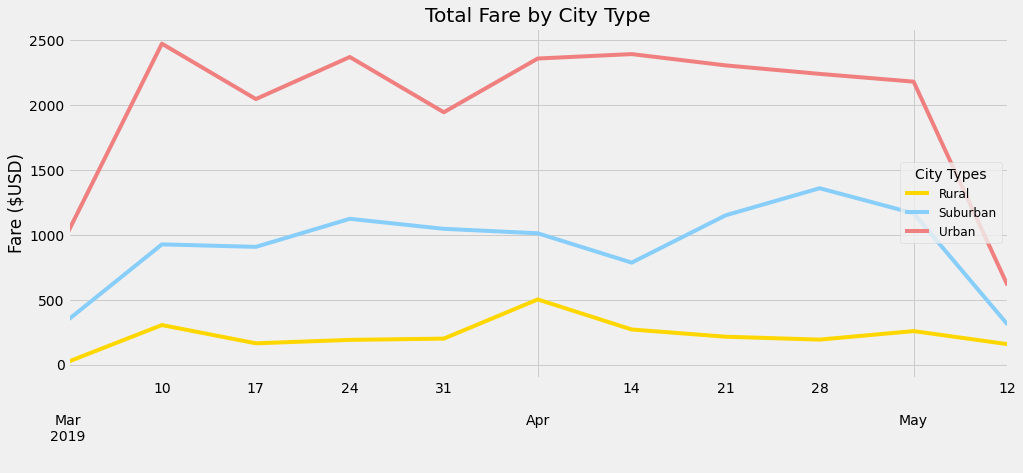

In [38]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(15,6))

fares_by_date.plot(kind="line", ax=ax, color=["gold", "lightskyblue", "lightcoral"])

ax.set_title("Total Fare by City Type")

ax.set_ylabel("Fare ($USD)")

ax.set_xlabel(" ")

lgnd = plt.legend(fontsize="12", mode="Expanded", title="City Types", loc = "right")

# Save Figure

plt.savefig("analysis/PyBer_fare_summary.png")

plt.show()
